In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Group-movie-recommender-system

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Group-movie-recommender-system


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning

##### extract top 2%(previously 1%) played music

In [ ]:
df = echo_nest_df[echo_nest_df["playcount"]>0]
music_ids = df["music_id"].unique().tolist()
music_playcount_dic = {}
for id in music_ids:
  music_playcount_dic[id] = 0

for k in range(len(df)):
  music_playcount_dic[df.iloc[k][1]] += df.iloc[k][2]

In [ ]:
# import the data frame
# music_playcount_df.to_csv("music_playcount.tsv", sep="\t", index = False, header = False)
music_playcount_df = pd.read_csv("music_playcount.tsv", sep="\t", names = ["total_playcount", "music_id"])

In [ ]:
#music_playcount_df = pd.DataFrame.from_dict(music_playcount_dic, orient='index')
#music_playcount_df["music_id"] = music_playcount_df.index
#music_playcount_df.columns = ["total_playcount","music_id"] 
music_playcount_df

,total_playcount,music_id
0,61264,SOMGIYR12AB0187973
1,3460,SOMZWUW12A8C1400BC
2,6705,SOYHEPA12A8C13097F
3,389,SOAFPAX12AB0187A17
4,11,SOQTRKE12A6701C596
...,...,...
227742,21,SOHCOJG12AB0184C66
227743,6,SONHMZP12A8C13F351
227744,16,SOBMAEL12A58A7B52F
227745,11,SOQJZAU12A8C13CB70


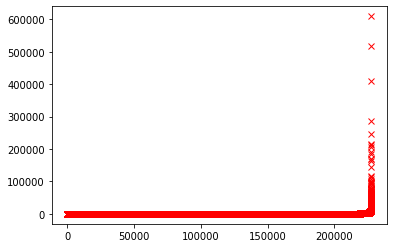

In [ ]:
x = music_playcount_df["total_playcount"].tolist()
x.sort()
plt.plot(x,"rx")

In [ ]:
music_playcount_df = music_playcount_df.sort_values(["total_playcount"], ignore_index = True, ascending=False)
top_musics = music_playcount_df.iloc[:int(len(music_playcount_df)*0.02)]

In [ ]:
top_musics

,total_playcount,music_id
0,609175,SOBONKR12A58A7A7E0
1,517908,SOAUWYT12A81C206F1
2,409350,SOSXLTC12AF72A7F54
3,286673,SOEGIYH12A6D4FC0E3
4,247243,SOFRQTD12A81C233C0
...,...,...
4549,2349,SODFKXK12A6D4F76FE
4550,2349,SONXRHI12A8C143D62
4551,2349,SODAMRS12A8C142682
4552,2348,SOZWPHG12AB018666E


In [ ]:
top_music_indexes = top_musics["music_id"].to_list()

In [ ]:
# statistics of all playcount

print(music_playcount_df["total_playcount"].max())
print(music_playcount_df["total_playcount"].mean())
print(music_playcount_df["total_playcount"].median())
print(music_playcount_df["total_playcount"].value_counts().idxmax())

609175
294.7678564371869
37.0
6


##### Extract top 0.2%(previously 1%) active users

In [ ]:
df = echo_nest_df[echo_nest_df["playcount"]>5]
user_ids = df["user_id"].unique().tolist()
user_playcount_dic = {}
for id in user_ids:
  user_playcount_dic[id] = 0

for k in range(len(df)):
  user_playcount_dic[df.iloc[k][0]] += df.iloc[k][2]

In [ ]:
user_playcount_df = pd.DataFrame.from_dict(user_playcount_dic, orient="index")
user_playcount_df["user_id"] = user_playcount_df.index
user_playcount_df.columns = ["total_playcount","user_id"] 
user_playcount_df

,total_playcount,user_id
b80344d063b5ccb3212f76538f3d9e43d87dca9e,20,b80344d063b5ccb3212f76538f3d9e43d87dca9e
8937134734f869debcab8f23d77465b4caaa85df,32,8937134734f869debcab8f23d77465b4caaa85df
969cc6fb74e076a68e36a04409cb9d3765757508,62,969cc6fb74e076a68e36a04409cb9d3765757508
4bd88bfb25263a75bbdd467e74018f4ae570e5df,63,4bd88bfb25263a75bbdd467e74018f4ae570e5df
e006b1a48f466bf59feefed32bec6494495a4436,20,e006b1a48f466bf59feefed32bec6494495a4436
...,...,...
4d5b26d3f618ce63ba018fe34d57e71f1b8e2184,1011,4d5b26d3f618ce63ba018fe34d57e71f1b8e2184
8305c896f42308824da7d4386f4b9ee584281412,192,8305c896f42308824da7d4386f4b9ee584281412
ca99d94daa9d5231643a08aac2f3bfb645e73b09,339,ca99d94daa9d5231643a08aac2f3bfb645e73b09
cf8289419383259189afe6bb50c5115fd84f1064,204,cf8289419383259189afe6bb50c5115fd84f1064


In [ ]:
user_playcount_df.to_csv("user_playcount", sep="\t", index = False, header = False)

In [ ]:
user_playcount_df = pd.read_csv("user_playcount", sep="\t", names=["total_playcount", "user_id"])

In [ ]:
user_playcount_df = user_playcount_df.sort_values(["total_playcount"], ignore_index = True, ascending = False)
top_users = user_playcount_df.iloc[:int(len(user_playcount_df)*0.002)]

In [ ]:
top_user_indexes = top_users["user_id"].to_list()

##### Build top 1% new dataset

In [ ]:
df_ = df
len(df_)

5010444

In [ ]:
df = echo_nest_df[echo_nest_df["playcount"]>5]

In [ ]:
df.reset_index(inplace = True, drop = True)
df

,user_id,music_id,playcount
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMGIYR12AB0187973,6
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOMZWUW12A8C1400BC,6
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOYHEPA12A8C13097F,8
3,8937134734f869debcab8f23d77465b4caaa85df,SOAFPAX12AB0187A17,6
4,8937134734f869debcab8f23d77465b4caaa85df,SOQTRKE12A6701C596,11
...,...,...,...
5010439,cf8289419383259189afe6bb50c5115fd84f1064,SOWJIBM12A81C2242B,6
5010440,cf8289419383259189afe6bb50c5115fd84f1064,SOYCHBY12A8AE478AA,6
5010441,cf8289419383259189afe6bb50c5115fd84f1064,SOYSPLQ12AB0185D3F,7
5010442,cf8289419383259189afe6bb50c5115fd84f1064,SOZCDWG12A6D4F81E1,6


In [ ]:
df.iloc[1][0]

'b80344d063b5ccb3212f76538f3d9e43d87dca9e'

In [ ]:
str(2*0.5)[:3]

'1.0'

In [ ]:
new_dataset = []
count = 0
for k in range(len(df)):
  if df.iloc[k][0] in top_user_indexes:
    new_dataset.append(df.iloc[k].to_list())
  if k % 100 == 0:
    print(str((k / 5010444)*100)[:6], "  ", len(new_dataset))

流式输出内容被截断，只能显示最后 5000 行内容。
90.021    85889
90.023    85889
90.025    85889
90.027    85889
90.029    85889
90.031    85889
90.033    85889
90.035    85889
90.037    85889
90.039    85889
90.041    85889
90.043    85889
90.045    85889
90.047    85889
90.049    85889
90.051    85889
90.053    85889
90.055    85889
90.057    85889
90.059    85889
90.061    85889
90.063    85889
90.065    85889
90.067    85889
90.069    85889
90.071    85889
90.073    85889
90.075    85889
90.077    85889
90.079    85889
90.081    85889
90.083    85889
90.085    85889
90.087    85889
90.089    85889
90.091    85889
90.093    85889
90.095    85889
90.097    85889
90.099    85889
90.101    85889
90.103    85889
90.105    85889
90.107    85889
90.109    85889
90.111    85889
90.113    85889
90.115    85889
90.117    85889
90.119    85889
90.121    85889
90.123    85889
90.125    85889
90.127    85889
90.129    85889
90.131    85889
90.133    85889
90.135    85889
90.137    85889
90.139    85889
90.141    858

In [ ]:
new_dataset_df = pd.DataFrame(new_dataset, columns = ["user_id","music_id","playcount"])
new_dataset_df

,user_id,music_id,playcount
0,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOAEHEX12A8C13EFA4,21
1,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOFLEPO12A8C14043F,11
2,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOFRRFT12A8C140C5C,1890
3,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOHKAXT12A8C13FC28,78
4,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOXRMTW12A8C142B80,13
...,...,...,...
95534,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOYEUPH12A8AE45FFC,11
95535,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOYWBPL12B0B80BD74,9
95536,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOZKHNG12A6D4F84A6,8
95537,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOZSLZG12A58A765A8,15


In [ ]:
new_dataset_df.to_csv("new_dataset_user_filtered.tsv", sep = "\t", header = False, index = False)

In [ ]:
new_dataset_df.iloc[50][1]

'SOGEKSP12A58A78530'

In [ ]:
EN_top1percent = []
for k in range(len(new_dataset_df)):
  if new_dataset_df.iloc[k][1] in top_music_indexes:
    EN_top1percent.append(new_dataset_df.iloc[k].to_list())
  if k % 100 == 0:
    print(str((k / 95539)*100)[:6], "  ", len(EN_top1percent))

0.0    1
0.1046    22
0.2093    53
0.3140    94
0.4186    117
0.5233    153
0.6280    203
0.7326    240
0.8373    281
0.9420    300
1.0466    366
1.1513    430
1.2560    492
1.3607    522
1.4653    555
1.5700    594
1.6747    634
1.7793    690
1.8840    751
1.9887    777
2.0933    811
2.1980    848
2.3027    859
2.4073    906
2.5120    943
2.6167    1011
2.7214    1047
2.8260    1093
2.9307    1136
3.0354    1168
3.1400    1189
3.2447    1191
3.3494    1220
3.4540    1264
3.5587    1303
3.6634    1364
3.7680    1384
3.8727    1432
3.9774    1483
4.0821    1536
4.1867    1598
4.2914    1616
4.3961    1635
4.5007    1690
4.6054    1734
4.7101    1777
4.8147    1843
4.9194    1880
5.0241    1917
5.1287    1968
5.2334    2031
5.3381    2082
5.4428    2117
5.5474    2146
5.6521    2158
5.7568    2183
5.8614    2245
5.9661    2277
6.0708    2349
6.1754    2427
6.2801    2486
6.3848    2539
6.4894    2585
6.5941    2636
6.6988    2690
6.8035    2758
6.9081    2823
7.0128    2872
7.1175    292

In [ ]:
EN_top1percent_df = pd.DataFrame(EN_top1percent, columns = ["user_id","music_id","playcount"])
EN_top1percent_df.to_csv("EN41K.tsv", sep = "\t", header = False, index = False)

In [ ]:
EN_top1percent_df

,user_id,music_id,playcount
0,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOAEHEX12A8C13EFA4,21
1,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOZAFNE12AAF3B50E6,12
2,da681f423e8574d2581534fd138eae264dea0f5c,SOAQGES12A8C133FB5,9
3,da681f423e8574d2581534fd138eae264dea0f5c,SOBEJBH12AC468A455,26
4,da681f423e8574d2581534fd138eae264dea0f5c,SOBNCNF12A8C13F62E,12
...,...,...,...
41057,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOURDOP12A58A7EF02,11
41058,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOUVUHC12A67020E3B,6
41059,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOWWCNJ12A81C1FFA5,8
41060,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOYWBPL12B0B80BD74,9


### Transfer playcounts to rates

In [ ]:
df = pd.read_csv("EN41K.tsv", sep = "\t", names = ["user_id", "music_id", "playcount"])

In [ ]:
df

,user_id,music_id,playcount
0,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOAEHEX12A8C13EFA4,21
1,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOZAFNE12AAF3B50E6,12
2,da681f423e8574d2581534fd138eae264dea0f5c,SOAQGES12A8C133FB5,9
3,da681f423e8574d2581534fd138eae264dea0f5c,SOBEJBH12AC468A455,26
4,da681f423e8574d2581534fd138eae264dea0f5c,SOBNCNF12A8C13F62E,12
...,...,...,...
41057,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOURDOP12A58A7EF02,11
41058,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOUVUHC12A67020E3B,6
41059,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOWWCNJ12A81C1FFA5,8
41060,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOYWBPL12B0B80BD74,9


In [ ]:
music_ids = df["music_id"].unique().tolist()
music_playcount_dic = {}
for id in music_ids:
  music_playcount_dic[id] = 0

for k in range(len(df)):
  music_playcount_dic[df.iloc[k][1]] += df.iloc[k][2]

music_playcount_df = pd.DataFrame.from_dict(music_playcount_dic, orient='index')
music_playcount_df["music_id"] = music_playcount_df.index
music_playcount_df.columns = ["total_playcount","music_id"] 
music_playcount_df = music_playcount_df.sort_values(["total_playcount"], ignore_index = True, ascending=False)

In [ ]:
music_rank = music_playcount_df["music_id"].to_list()
music_rank

['SOBONKR12A58A7A7E0',
 'SOAOSDF12A58A779F1',
 'SOSXLTC12AF72A7F54',
 'SOPUCYA12A8C13A694',
 'SOAUWYT12A81C206F1',
 'SOFRQTD12A81C233C0',
 'SOHTKMO12AB01843B0',
 'SONYKOW12AB01849C9',
 'SOEGIYH12A6D4FC0E3',
 'SOOFYTN12A6D4F9B35',
 'SOUFTBI12AB0183F65',
 'SOUNZHU12A8AE47481',
 'SOTWNDJ12A8C143984',
 'SOAXGDH12A8C13F8A1',
 'SOBOUPA12A6D4F81F1',
 'SOZTEZR12A8C14204B',
 'SODJWHY12A8C142CCE',
 'SOUNJIO12AB0181339',
 'SOVLAWN12A81C234AB',
 'SODWXJW12AAA8C5C29',
 'SONIQRE12AF72A2B02',
 'SOTCMDJ12A6D4F8528',
 'SOLFXKT12AB017E3E0',
 'SOXLOQG12AF72A2D55',
 'SOXFPND12AB017C9D1',
 'SOWCKVR12A8C142411',
 'SOFLJQZ12A6D4FADA6',
 'SOPXKYD12A6D4FA876',
 'SOFCGSE12AF72A674F',
 'SOVQQJO12AB0182328',
 'SOCNAXF12A6D4F9B34',
 'SOLLNTU12A6701CFDC',
 'SOBOAFP12A8C131F36',
 'SONSTND12AB018516E',
 'SOUSMXX12AB0185C24',
 'SOIZFTE12AB0186842',
 'SOVDSJC12A58A7A271',
 'SOMLYJD12A58A7B155',
 'SOGDNAW12A6D4F6804',
 'SOLGPOU12A58A7EA20',
 'SOMCAFM12A58A7B024',
 'SOGVKZV12A8C143863',
 'SOOJJCT12A6310E1C0',
 'SOJSXJY12

In [ ]:
user_ids = df.user_id.unique().tolist()
music_ids = df.music_id.unique().tolist()
print(len(user_ids), len(music_ids))

1353 4362


In [ ]:
# build a dictionary of user's that contains their music history and play counts

stats = {}
count = 0
for user_id in user_ids:
  music_history ={}
  count += 1
  print(count, "progress", str((count/6682)*100)[:5])
  history_data = df[df["user_id"]==user_id]
  music_list = history_data.music_id.to_list()
  for music in music_list:
    music_history[music] = history_data[history_data["music_id"] == music]["playcount"].values[0]
  stats[user_id] = music_history

1 progress 0.014
2 progress 0.029
3 progress 0.044
4 progress 0.059
5 progress 0.074
6 progress 0.089
7 progress 0.104
8 progress 0.119
9 progress 0.134
10 progress 0.149
11 progress 0.164
12 progress 0.179
13 progress 0.194
14 progress 0.209
15 progress 0.224
16 progress 0.239
17 progress 0.254
18 progress 0.269
19 progress 0.284
20 progress 0.299
21 progress 0.314
22 progress 0.329
23 progress 0.344
24 progress 0.359
25 progress 0.374
26 progress 0.389
27 progress 0.404
28 progress 0.419
29 progress 0.434
30 progress 0.448
31 progress 0.463
32 progress 0.478
33 progress 0.493
34 progress 0.508
35 progress 0.523
36 progress 0.538
37 progress 0.553
38 progress 0.568
39 progress 0.583
40 progress 0.598
41 progress 0.613
42 progress 0.628
43 progress 0.643
44 progress 0.658
45 progress 0.673
46 progress 0.688
47 progress 0.703
48 progress 0.718
49 progress 0.733
50 progress 0.748
51 progress 0.763
52 progress 0.778
53 progress 0.793
54 progress 0.808
55 progress 0.823
56 progress 0.838
5

In [ ]:
len(stats)

1353

In [ ]:
#import random
#from library import *


libs = stats
#random.shuffle(libs)

#    if "mpacula" not in libs:
#        libs.append("mpacula")
#    if "impied" not in libs:
#        libs.append("impied")

uid = 0
aid = 0
user_names = {}
musics = {}

#f_matrix.write("#user_id\tartist_id\trating\n")

f_matrix = []
f_artists = {}
f_users = {}
f_stats = []
scores = []
c_user = 0

for user_name in user_ids:
  
  # get music list for a user and sort by the playcount
  user_music_df = pd.DataFrame.from_dict(stats[user_name], orient='index', columns = ["playcount"])
  user_music_df.sort_values(by="playcount", ascending = True, inplace = True)
  user_musics = user_music_df.index.to_list()

  # get total plays for the user
  total_plays = user_music_df["playcount"].sum()

  if total_plays < 1:
      continue

  # assign artists and users to unique IDs (uid)
  if user_name not in user_names:
    user_names[user_name] = uid
    uid += 1

  bin_sizes = {}
  # compute bin statistics - used to adjust scores
  percentile = 1
  for every_music in user_musics:
    frequency = float(user_music_df.playcount[every_music] / total_plays)

    # put music in a bin 3...0 where 3 = top 25% percentile,
    # 0 = bottom 25% percentile
    if percentile == 1:
      bin_id = 3
    else:
      bin_id = int(4*percentile)

    # keep track of the number of artists in each bin
    if bin_id not in bin_sizes:
      bin_sizes[bin_id] = 1
    else:
      bin_sizes[bin_id] = bin_sizes[bin_id] + 1
    
    #print("check: ",bin_sizes[bin_id])
    
    percentile -= frequency

            
  # find max bin size
  max_bin_size = 1
  for bin_id in bin_sizes:
    size = bin_sizes[bin_id]
    if size > max_bin_size:
      max_bin_size = size

  # compute score for each artist
  percentile = 1
  for every_music in user_musics:
    if every_music not in musics:
      musics[every_music] = aid
      aid += 1

    frequency = float(user_music_df.playcount[every_music]) / total_plays

    # put artist in a bin 3...0 where 3 = top 25% percentile,
    # 0 = bottom 25% percentile
    if percentile == 1:
      bin_id = 3
    else:
      bin_id = int(4*percentile)
                
    # compute the unadjusted score
    unadjusted_score = 4.0*percentile

    #score = unadjusted_score * float(max_bin_size) / float(bin_sizes[bin_id])
    score = unadjusted_score
    scores.append(score)

    # write out the matrix entry
    #print(user_name)
    #print(every_music)
    #print(score)
    #print(percentile)
    #print(max_bin_size)
    #print("bin_id: ", bin_id)
    #print(bin_sizes[bin_id])
    f_matrix.append([user_name, every_music, score, percentile, float(max_bin_size) / float(bin_sizes[bin_id])])

    percentile -= frequency

  if abs(percentile) > 0.000001:
    raise Exception("Final percentile must be 0, but was %f. This is a bug." % percentile)


  # show progress
  c_user += 1
  #estimator.tick()
  if c_user % 100 == 0:
    print("%d/%d remaining" % (c_user, len(libs)))


# write out artists map
#f_artists.write("#artist_id\tartist_name\n")
for music, aid in musics.items():
  f_artists[music] = aid

# write out user id map
#f_users.write("#user_id\tuser_name\n")
for user_name, uid in user_names.items():
  f_users[user_name] = uid


# print & write out statistics
stats_ = ""
stats_ += "users: %d\n" % len(user_names)
stats_ += "artists: %d\n" % len(musics)
stats_ += "scores: %d\n" % len(scores)
stats_ += "density%%: %f\n" % (float(100*len(scores)) / (len(user_names) * len(musics)))
stats_ += "score_avg: %f\n" % np.mean(scores)
stats_ += "score_stdev: %f\n" % np.std(scores)
f_stats.append(stats_)
    
print("\n\nDone! Statistics: \n\n" + stats_)    
        


100/1353 remaining
200/1353 remaining
300/1353 remaining
400/1353 remaining
500/1353 remaining
600/1353 remaining
700/1353 remaining
800/1353 remaining
900/1353 remaining
1000/1353 remaining
1100/1353 remaining
1200/1353 remaining
1300/1353 remaining


Done! Statistics: 

users: 1353
artists: 4362
scores: 41062
density%: 0.695755
score_avg: 2.808472
score_stdev: 1.005278



In [ ]:
# transfer f_matrix to dataframe
f_matrix_df = pd.DataFrame(f_matrix, columns = ["user_id","music_id", "rating", "percentile","bin_id"])
f_matrix_df

,user_id,music_id,rating,percentile,bin_id
0,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOZAFNE12AAF3B50E6,4.000000,1.000000,1.0
1,0d0f80a34807aab31a3521424d456d30bf2c93d9,SOAEHEX12A8C13EFA4,2.545455,0.636364,1.0
2,da681f423e8574d2581534fd138eae264dea0f5c,SOVMANN12A58A7C69C,4.000000,1.000000,1.0
3,da681f423e8574d2581534fd138eae264dea0f5c,SOYTEUF12A8C1438E1,3.960265,0.990066,1.0
4,da681f423e8574d2581534fd138eae264dea0f5c,SOWRCYH12A58A7C559,3.920530,0.980132,1.0
...,...,...,...,...,...
41057,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOBWFXM12AB0182808,1.104348,0.276087,2.0
41058,e0296306fc93085837a576022bd3f74dbd6d5b0d,SOBPHXV12A6D4F9FD0,0.921739,0.230435,3.5
41059,e0296306fc93085837a576022bd3f74dbd6d5b0d,SODYKBY12AC4687734,0.739130,0.184783,3.5
41060,e0296306fc93085837a576022bd3f74dbd6d5b0d,SONDPRQ12A6D4F50E0,0.547826,0.136957,3.5


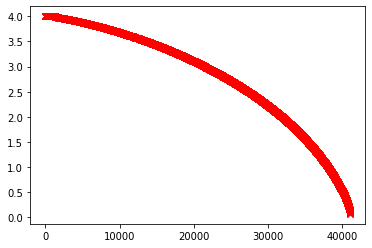

In [ ]:
# plot the distrbution of ratings
x = f_matrix_df.rating.to_list()
x.sort(reverse = True)
plt.plot(x,"rx")

In [ ]:
# chekc the index dictionary
print(len(f_users),len(f_artists))

1353 4362


In [ ]:
# build the training dataset
rate_dataset = []
for index, row in f_matrix_df.iterrows():
    user_id = row["user_id"]
    music_id = row["music_id"]
    rating = row["rating"]
    user_index = f_users[user_id]
    music_index = f_artists[music_id]
    rate_dataset.append([user_index, music_index, rating])

In [ ]:
# transform list type dataset to dataframe
rate_dataset_df = pd.DataFrame(rate_dataset, columns = ["user_id", "music_id", "ratings"])
rate_dataset_df

,user_id,music_id,ratings
0,0,0,4.000000
1,0,1,2.545455
2,1,2,4.000000
3,1,3,3.960265
4,1,4,3.920530
...,...,...,...
41057,1352,1137,1.104348
41058,1352,1205,0.921739
41059,1352,3966,0.739130
41060,1352,3835,0.547826


In [ ]:
# save dataframe to tsv file
rate_dataset_df.to_csv("EN_41K_rate.tsv", sep="\t", header = False, index = False )

In [ ]:
rate_dataset_df = pd.read_csv("EN_41K_rate.tsv", sep="\t", names=["user_id","music_id","ratings"])

In [ ]:
# Split the dataset

# shuffle and separate
#EN41K_train, EN41K_test = \
#              np.split(rate_dataset_df.sample(frac=1, random_state=42), 
#                       [int(0.8*len(rate_dataset_df))])

EN41K_train, EN41K_test = \
              np.split(rate_dataset_df, 
                       [int(0.8*len(rate_dataset_df))])

In [ ]:
EN41K_train.to_csv("EN41K_train.tsv", sep = "\t", header = False, index = False)
EN41K_test.to_csv("EN41K_test.tsv", sep="\t", header = False, index = False)

In [ ]:
#transform user & music index dictionary to dataframe
f_users_df = pd.DataFrame.from_dict(f_users, orient="index", columns = ["index"])
f_artists_df = pd.DataFrame.from_dict(f_artists, orient="index", columns = ["index"])

f_users_df["user_id"] = f_users_df.index
f_users_df.reset_index(drop=True, inplace = True)

f_artists_df["music_id"] = f_artists_df.index
f_artists_df.reset_index(drop = True, inplace = True)

In [ ]:
# and save to tsc file
f_users_df.to_csv("EN41K_UID2index.tsv", sep ="\t", header = False, index = False)
f_artists_df.to_csv("EN41K_MID2index.tsv", sep = "\t", header = False, index = False)

### Echonest original dataset(3Gb) to 1Gb Dataset

In [ ]:
echo_nest_df = pd.read_csv("train_triplets.txt", sep="\t", names = ["user_id","music_id","playcount"])

In [ ]:
df = echo_nest_df[echo_nest_df["playcount"]>5]
len(df["user_id"].unique())

680078

**Plots**

In [ ]:
echo_nest_df

,user_id,music_id,playcount
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3


In [ ]:
EN_mean = echo_nest_df["playcount"].mean()
EN_median = echo_nest_df["playcount"].median()
EN_mode = echo_nest_df["playcount"].value_counts().idxmax()
print(EN_mean)
print(EN_median)
print(EN_mode)

2.866858847305635
1.0
1


In [ ]:
EN_vc

1      28755966
2       7336825
3       3214271
5       2250999
4       1805081
         ...   
396           1
995           1
385           1
600           1
771           1
Name: playcount, Length: 720, dtype: int64

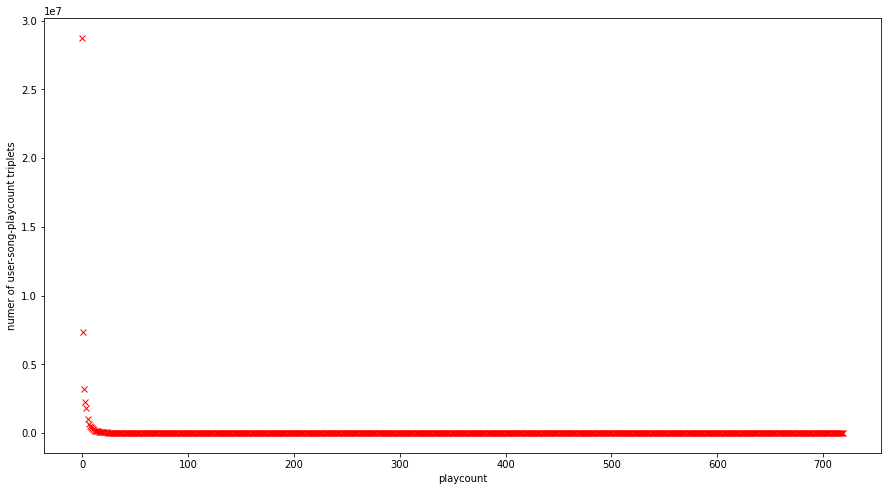

In [ ]:
EN_vc= echo_nest_df["playcount"].value_counts()
EN_vc_list = EN_vc.tolist()

fig, ax = plt.subplots(figsize=(15,8)) 

ax.set_xlabel('playcount')
ax.set_ylabel('numer of user-song-playcount triplets')

ax.plot(EN_vc_list, "rx")

In [ ]:
df_mean = df["playcount"].mean()
df_median = df["playcount"].median()
df_mode = df["playcount"].value_counts().idxmax()
print(df_mean)
print(df_median)
print(df_mode)

5.603344187521218
3.0
2


In [ ]:
print(len(echo_nest_df))
print(len(df))
print((len(df) / len(echo_nest_df)))

48373586
2043582
0.042245823991630474


In [ ]:
np.log2(500)

8.965784284662087

In [ ]:
df["playcount"].describe()

count    2.043577e+06
mean     2.194732e+01
std      2.290797e+01
min      1.100000e+01
25%      1.300000e+01
50%      1.600000e+01
75%      2.400000e+01
max      9.667000e+03
Name: playcount, dtype: float64

In [ ]:
x = df["playcount"].tolist()
x.sort()
x = pd.DataFrame(x[:-5], columns = ["playcounts"])
x

,playcounts
0,11
1,11
2,11
3,11
4,11
...,...
2043572,1961
2043573,2130
2043574,2165
2043575,2213


In [ ]:
x.describe()

,playcounts
count,2.043577e+06
mean,2.193657e+01
std,2.145405e+01
min,1.100000e+01
25%,1.300000e+01
50%,1.600000e+01
75%,2.400000e+01
max,2.368000e+03


In [ ]:
x["log10"] = np.log10(x["playcounts"])

In [ ]:
x

,playcounts,z_score,log10
0,11,1.037604,1.041393
1,11,1.037604,1.041393
2,11,1.037604,1.041393
3,11,1.037604,1.041393
4,11,1.037604,1.041393
...,...,...,...
2043572,1961,9.277216,3.292478
2043573,2130,9.441724,3.328380
2043574,2165,9.474158,3.335458
2043575,2213,9.517797,3.344981


In [ ]:
### Z Scores
mean = x["log10"].mean()
std = x["log10"].std()
dist = np.abs(x["log10"]-mean)/std
x["z_score"] = dist

In [ ]:
x.describe()

,playcounts,z_score,log10
count,2.043577e+06,2.043577e+06,2.043577e+06
mean,2.193657e+01,7.699000e-01,1.267837e+00
std,2.145405e+01,6.381644e-01,2.182379e-01
min,1.100000e+01,5.002066e-02,1.041393e+00
25%,1.300000e+01,3.417622e-01,1.113943e+00
50%,1.600000e+01,7.051654e-01,1.204120e+00
75%,2.400000e+01,1.037604e+00,1.380211e+00
max,2.368000e+03,9.652513e+00,3.374382e+00


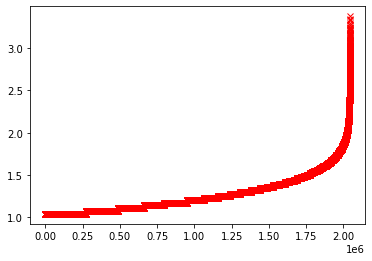

In [ ]:
plt.plot(x["log10"], "rx")

In [ ]:
echo_nest_df.describe()

,playcount
count,4.837359e+07
mean,2.866859e+00
std,6.437725e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.667000e+03


In [ ]:
# shuffle and separate
dataset_1g, dataset_2g = \
              np.split(echo_nest_df.sample(frac=1, random_state=42), 
                       [int(0.3*len(echo_nest_df))])

In [ ]:
dataset_1g_df = pd.read_csv("dataset_1g", sep="\t")

In [ ]:
dataset_1g_df.iloc[:10]

,Unnamed: 0,UserId,MusicID,PlayCount
0,35835386,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,30616108,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,11410320,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,44485949,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,18155718,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1
5,43227958,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1
6,10358181,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29
7,45150828,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2
8,31005414,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1
9,9933448,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1


In [ ]:
dataset_1g_df = dataset_1g_df.drop("Unnamed: 0", axis=1)

In [ ]:
dataset_1g_df.iloc[:5]

,UserId,MusicID,PlayCount
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1


In [ ]:
dataset_1g_df_sample = dataset_1g_df.sample(frac=1, random_state=42)

In [ ]:
train, test = \
              np.split(dataset_1g_df, 
                       [int(0.8*len(dataset_1g_df))])

In [ ]:
train.iloc[:10]

,UserId,MusicID,PlayCount
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1
5,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1
6,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29
7,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2
8,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1
9,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1


In [ ]:
column_name = ["UserId","MusicID","PlayCount"]
train.to_csv("train_data_800Mb", sep="\t", index=False, header=False) 
test.to_csv("test_data_200Mb", sep="\t", index=False, header=False)

In [ ]:
# shuffle and separate
dataset_6Mb_v2, dataset_2995Mb = \
              np.split(echo_nest_df, 
                       [int(0.002*len(echo_nest_df))])

In [ ]:
# shuffle and separate
train, test = \
              np.split(dataset_6Mb_v2, 
                       [int(0.8*len(dataset_6Mb_v2))])

In [ ]:
train.to_csv("train_data_5Mb", sep="\t", index=False, header=False) 
test.to_csv("test_data_2Mb", sep="\t", index=False, header=False)

In [ ]:
print(len(dataset_6Mb_v2["UserId"].unique()),
      len(dataset_6Mb_v2["MusicID"].unique()))

1978 43416


In [ ]:
for row in train.itertuples(index=False):
    ratings[row.user_id - 1, row.music_id - 1] = row.playcount

for row in test_data.itertuples(index=False):
    test_ratings[row.user_id - 1, row.music_id - 1] = row.playcount

In [ ]:
original_data = pd.read_csv("./data/u1.base", sep="\t", names=["UserId","MusicID","PlayCount","timestamp"])
original_data.iloc[:10]

,UserId,MusicID,PlayCount,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
5,1,7,4,875071561
6,1,8,1,875072484
7,1,9,5,878543541
8,1,11,2,875072262
9,1,13,5,875071805


### 1Gb Dataset to 500Mb Dataset and 100Mb Dataset

In [ ]:
# read 1GB dataset
column_name = ["UserId","MusicID","PlayCount"]
df =pd.read_csv("dataset_1g", sep="\t")

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

In [ ]:
print(len(df["UserId"].unique()), len(df["MusicID"].unique()))

1015273 329914


In [ ]:
df.iloc[:10]

,UserId,MusicID,PlayCount
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1
5,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1
6,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29
7,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2
8,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1
9,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1


In [ ]:
dataset_500Mb_1, dataset_500Mb_2 = \
              np.split(df, 
                       [int(0.5*len(df))])

In [ ]:
dataset_500Mb_1.iloc[:10]

,UserId,MusicID,PlayCount
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1
5,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1
6,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29
7,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2
8,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1
9,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1


In [ ]:
train, test = \
              np.split(dataset_500Mb_1, 
                       [int(0.8*len(dataset_500Mb_1))])

In [ ]:
column_name = ["UserId","MusicID","PlayCount"]
test_df = pd.read_csv("./data/train_data_80Mb", sep = "\t", names=column_name)
print(len(test_df["UserId"].unique()), len(test_df["MusicID"].unique()))



546798 156066


In [ ]:
train.to_csv("./data/train_data_400Mb", sep ="\t", index=False, header=False)
test.to_csv("./data/test_data_100Mb", sep = "\t", index=False, header=False)
test_df = pd.read_csv("./data/test_data_100Mb", sep = "\t", names=column_name)
test_df.iloc[:10]

,UserId,MusicID,PlayCount
0,25076d5c2efb605be0cc3e476e264564fb2e6974,SOJTEOO12A6D4FDB95,1
1,d45c269d8d4f8e550938719ca00dac449ecef062,SOFCRBD12A8C1350EA,1
2,1fd3ed2da1c2c11ca1adc1cd8ef04993b9ddae10,SOKJRAT12A8C142ECA,1
3,7cc1efd40ec381f30cf6ea7d469eec256cbf65d6,SODLYRF12AB01861E0,4
4,5ead13fcf7860085b1d08e83266051c1441e8262,SODYJJO12A58A7C861,7
5,2509e2af0bff4e128b75b215a316873442d422e5,SOHYKNV12AB01836B9,1
6,102cadecdcdbd2aedf52d72cd866c25ec1e39a4b,SOWVYPH12A8C137D88,2
7,be8905a874d3dd9ba576133b46f70b3f82b4624e,SOBBKGF12A8C1311EE,3
8,0584630cbee8814e337d362e88314203579d0f27,SOKEYJQ12A6D4F6132,1
9,3880c395432f87d1c008e58b83a8c12a2469363d,SOMBQAV12A8C137AA3,1


In [ ]:
dataset_100Mb, dataset_900Mb = \
              np.split(df, 
                       [int(0.1*len(df))])

In [ ]:
dataset_100Mb.iloc[:10]

,UserId,MusicID,PlayCount
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1
5,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1
6,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29
7,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2
8,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1
9,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1


In [ ]:
train, test = \
              np.split(dataset_100Mb, 
                       [int(0.8*len(dataset_100Mb))])

In [ ]:
train.iloc[:10]

,UserId,MusicID,PlayCount
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1
5,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1
6,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29
7,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2
8,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1
9,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1


In [ ]:
train.to_csv("./data/train_data_80Mb", sep ="\t", index=False, header=False)
test.to_csv("./data/test_data_20Mb", sep = "\t", index=False, header=False)
test_df = pd.read_csv("./data/test_data_20Mb", sep = "\t", names=column_name)
test_df.iloc[:10]

,UserId,MusicID,PlayCount
0,af7394d89b812a047d4bfcc2cf889505fd7f670c,SOXWQUF12A6D4F9594,1
1,58a0bbc3d9c527370a3062ac93e4243c8083d750,SOMYXWV12A8C14232E,2
2,f38405c2fb95738a24461783a8b1a993c01c97d7,SORUTBL12A8AE469A1,1
3,b241d3b56658b70009464c9cddb061c2577613b6,SOHTQAS12A6701C7BA,3
4,f7d7484b052d267849ae3ceecf63f9655e6f89a0,SOFEGST12A58A7D682,1
5,2ac346f08a2a58266e1ad47036b76155f99084fe,SOPAYPV12AB017DB0C,1
6,a33c0f70629d43d77b37ec38026cb162d4ae982d,SOTOFAF12A8C134776,1
7,5a4f51bea5a2a870501bcd45d554f73c4f62c451,SOZTYFG12A6D4F946B,2
8,e7e5e2e213072a00d701b15c570802bcba7f4578,SOLRPJX12A58A79808,6
9,8faf49f9627e5aed391b40b7411e350133c1286d,SORSGEA12AC468E6C2,1


In [ ]:
dataset_100K, Dataset_999Mb = \
              np.split(df, 
                       [int(0.0005*len(df))])

In [ ]:
dataset_100K
print(len(dataset_100K["UserId"].unique()), len(dataset_100K["MusicID"].unique()))

7193 5993


### Mapping user_id & music_id to indexes

In [ ]:
column_names = ["user_id","music_id","playcount"]
df_train_data = pd.read_csv("train_data_5Mb", sep="\t", names = column_names)
df_test_data = pd.read_csv("test_data_2Mb", sep="\t", names = column_names)

In [ ]:
print(len(df_train_data), len(df_test_data))

77397 19350


In [ ]:
df = pd.concat([df_train_data,df_test_data], axis = 0, ignore_index = True)

In [ ]:
print(len(df), 77397+19350)

96747 96747


In [ ]:
user_ids = df["user_id"].unique()
music_ids = df["music_id"].unique()
user_id_to_index = {x: i for i, x in enumerate(user_ids)}
music_id_to_index = {x: i for i, x in enumerate(music_ids)}

In [ ]:
# make indexed dataset
df["user_index"] = [user_id_to_index[i] for i in df["user_id"]]
df["music_index"] = [music_id_to_index[i] for i in df["music_id"]]
df.iloc[:10]

,user_id,music_id,playcount,user_index,music_index
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,0,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,0,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,0,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,0,3
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,0,4
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1,0,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2,0,6
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1,0,7
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXALG12A8C13C108,1,0,8
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,0,9


In [ ]:
user_ids = dataset_100K["user_id"].unique()
music_ids = dataset_100K["music_id"].unique()
user_id_to_index = {x: i for i, x in enumerate(user_ids)}
music_id_to_index = {x: i for i, x in enumerate(music_ids)}

In [ ]:
# make indexed dataset
dataset_100K["user_index"] = [user_id_to_index[i] for i in dataset_100K["user_id"]]
dataset_100K["music_index"] = [music_id_to_index[i] for i in dataset_100K["music_id"]]
dataset_100K.iloc[:10]

,user_id,music_id,playcount,user_index,music_index
0,3f5a8726bc27eaca076ef683b31fb4004bc37e2e,SONZIVI12A8C137F0B,1,0,0
1,1ec40bf4a83123f80f92b6a108bc81272b8b6a19,SOWYFFH12AAF3B4C65,3,1,1
2,c4fe3474c1c0510b677a654370283debf026df36,SOTYLCV12A8C143772,5,2,2
3,6fac1aa6253ce9e0d9f0d6e9f188151289838088,SOPMQFR12A6701FC26,2,3,3
4,8e30e533babed91b27f4de12a48e27bb4112ae04,SOFSRLA12A8C144F52,1,4,4
5,6f066ac956153699db5e91ae793389091b3d7b8e,SOMZVGZ12A8C140EFF,1,5,5
6,04e49d0483be321b23e61ea94897d40f9526a8ff,SOKENKR12AB01828F7,29,6,6
7,ce593e3e2b9545eb24265aaf741e0dc4410d9370,SOFLJQZ12A6D4FADA6,2,7,7
8,f243361147428b9d78fa304a995b12791fce87e4,SOMVZLS12A8C13D58B,1,8,8
9,8f29b7c7911b46330f547b361eccbe8fe27df25c,SOLDUYB12A67020910,1,9,9


In [ ]:
df_dataset_100K = pd.concat([dataset_100K["user_index"],dataset_100K["music_index"],dataset_100K["playcount"]], axis=1, ignore_index = True)
df_dataset_100K.columns = column_names
df_dataset_100K.iloc[:10]

,user_id,music_id,playcount
0,0,0,1
1,1,1,3
2,2,2,5
3,3,3,2
4,4,4,1
5,5,5,1
6,6,6,29
7,7,7,2
8,8,8,1
9,9,9,1


In [ ]:
df_dataset = pd.concat([df["user_index"],df["music_index"],df["playcount"]], axis=1, ignore_index = True)
df_dataset.columns = column_names
df_dataset.iloc[:10]

,user_id,music_id,playcount
0,0,0,1
1,0,1,1
2,0,2,2
3,0,3,1
4,0,4,1
5,0,5,1
6,0,6,2
7,0,7,1
8,0,8,1
9,0,9,1


In [ ]:
train_data_5Mb, test_data_2Mb = \
              np.split(df_dataset, 
                       [int(0.8*len(df_dataset))])

In [ ]:
train_data_5Mb.to_csv("train_data_5Mb.tsv", sep="\t", index = False, header = False)
test_data_2Mb.to_csv("test_data_2Mb.tsv", sep="\t", index = False, header = False)
test_df = pd.read_csv("test_data_2Mb.tsv", sep = "\t", names=column_name)
test_df.iloc[:10]

,user_id,music_id,playcount
0,1614,222,2
1,1614,31321,1
2,1614,37466,1
3,1614,37467,2
4,1614,37468,1
5,1614,27092,1
6,1614,1833,4
7,1615,4407,2
8,1615,9308,2
9,1615,7366,2


In [ ]:
?max

In [ ]:
max(train_data_5Mb["music_id"].unique())

37465

In [ ]:
df_user_id_to_index = pd.DataFrame.from_dict(user_id_to_index, orient = "index", columns = ["user_index"])
df_user_id_to_index['user_id'] = df_user_id_to_index.index
df_user_id_to_index = df_user_id_to_index.reset_index(drop=True)

df_music_id_to_index = pd.DataFrame.from_dict(music_id_to_index, orient = "index", columns = ["music_index"])
df_music_id_to_index['music_id'] = df_music_id_to_index.index
df_music_id_to_index = df_music_id_to_index.reset_index(drop=True)

df_user_id_to_index.iloc[:10]

,music_index,music_id
0,0,SOAKIMP12A8C130995
1,1,SOAPDEY12A81C210A9
2,2,SOBBMDR12A8C13253B
3,3,SOBFNSP12AF72A0E22
4,4,SOBFOVM12A58A7D494
5,5,SOBNZDC12A6D4FC103
6,6,SOBSUJE12A6D4F8CF5
7,7,SOBVFZR12A6D4F8AE3
8,8,SOBXALG12A8C13C108
9,9,SOBXHDL12A81C204C0


In [ ]:
df_user_id_to_index.to_csv("user_id_to_index.tsv", sep = "\t", header = False, index = False)
df_music_id_to_index.to_csv("music_id_to_index.tsv", sep = "\t", header = False, index = False)

### Scale the playcount

In [ ]:
column_names = ["user_id","music_id","playcount"]
df_train_data = pd.read_csv("train_data_5Mb.tsv", sep="\t", names = column_names)
df_test_data = pd.read_csv("test_data_2Mb.tsv", sep="\t", names = column_names)

In [ ]:
df_train_data["playcount"] = df_train_data["playcount"].apply(np.log10, axis =1)

In [ ]:
df_test_data["playcount"] = df_test_data["playcount"].apply(np.log10, axis =1)

In [ ]:
df_train_data = df_train_data[df_train_data["playcount"]>0]
df_test_data = df_test_data[df_test_data["playcount"]>0]

In [ ]:
column_names = ["user_id","music_id","playcount"]
df_train_data.to_csv("train_data_5Mb.tsv", sep="\t", index = False, header = False)
df_test_data.to_csv("test_data_2Mb.tsv", sep="\t", index = False, header = False)
test_df = pd.read_csv("test_data_2Mb.tsv", sep = "\t", names=column_names)
test_df.iloc[:10]

,user_id,music_id,playcount
0,1614,222,0.301030
1,1614,37467,0.301030
2,1614,1833,0.602060
3,1615,4407,0.301030
4,1615,9308,0.301030
5,1615,7366,0.301030
6,1615,37469,0.301030
7,1615,18978,0.301030
8,1615,2110,0.477121
9,1615,30140,0.301030


In [ ]:
df_dataset = pd.concat([df_train_data, df_test_data], axis=0, ignore_index = True)
# df_dataset.columns = column_names
df_dataset.iloc[:10]

,user_id,music_id,playcount
0,0,0,1
1,0,1,1
2,0,2,2
3,0,3,1
4,0,4,1
5,0,5,1
6,0,6,2
7,0,7,1
8,0,8,1
9,0,9,1


In [ ]:
df_dataset["playcount"].describe()

count    96747.000000
mean         2.906002
std          8.741277
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       1890.000000
Name: playcount, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

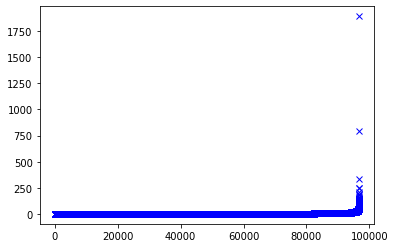

In [ ]:
y = df_dataset["playcount"].tolist()
y.sort()
x = np.arange(0,len(df_dataset),1)

plt.plot(x,y,"bx")


In [ ]:
y = df_dataset["playcount"].tolist()
playcount_overone = [i for i in y if i>1]
playcount_belowone = [i for i in y if i<=1]
percentage = (len(playcount_overone) / len(y)) * 100
print(len(playcount_overone), len(playcount_belowone),str(percentage)[:4])

39300 57447 40.6


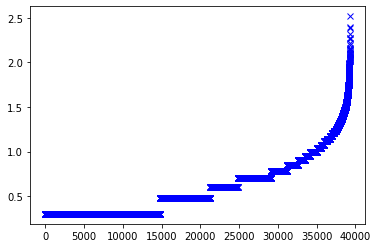

In [ ]:
y = df_dataset["playcount"].tolist()
y = np.log10([i for i in y if i>1 and i<500])
y.sort()
x = np.arange(0,len(y),1)

plt.plot(x,y,"bx")

In [ ]:
y = pd.DataFrame(df_dataset["playcount"])

,playcount
0,0.000000
1,0.000000
2,0.301030
3,0.000000
4,0.000000
...,...
96742,0.301030
96743,0.778151
96744,0.000000
96745,0.778151


In [ ]:
minmax = MinMaxScaler((0,1)).fit_transform(pd.DataFrame(y).values.reshape(-1, 1))
#print(len(minmax))
minmax = pd.DataFrame(minmax)
minmax.describe()

,0
count,39298.000000
mean,0.130507
std,0.143935
min,0.000000
25%,0.000000
50%,0.079410
75%,0.215163
max,1.000000


In [ ]:
np.log10(2)

0.3010299956639812

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_dataset["playcount"] = MinMaxScaler((0,5)).fit_transform(df_dataset["playcount"].values.reshape(-1, 1))
df_dataset["playcount"].describe()

count    96747.000000
mean         0.005045
std          0.023137
min          0.000000
25%          0.000000
50%          0.000000
75%          0.005294
max          5.000000
Name: playcount, dtype: float64

In [ ]:
df_dataset["playcount"].iloc[:10]

0    0.000000
1    0.000000
2    0.002647
3    0.000000
4    0.000000
5    0.000000
6    0.002647
7    0.000000
8    0.000000
9    0.000000
Name: playcount, dtype: float64

In [ ]:
df_dataset.iloc[-10:]

,user_id,music_id,playcount
96737,1977,43413,0.002647
96738,1977,22046,0.002647
96739,1977,16344,0.021175
96740,1977,11126,0.000000
96741,1977,43414,0.000000
96742,1977,39556,0.002647
96743,1977,4642,0.013235
96744,1977,43415,0.000000
96745,1977,25847,0.013235
96746,1977,16281,0.000000


In [ ]:
train_data_5Mb, test_data_2Mb = \
              np.split(df_dataset, 
                       [int(0.8*len(df_dataset))])

train_data_5Mb.to_csv("train_data_5Mb.tsv", sep="\t", index = False, header = False)
test_data_2Mb.to_csv("test_data_2Mb.tsv", sep="\t", index = False, header = False)
test_df = pd.read_csv("test_data_2Mb.tsv", sep = "\t", names=column_names)
test_df.iloc[:10]

,user_id,music_id,playcount
0,1614,222,0.002647
1,1614,31321,0.000000
2,1614,37466,0.000000
3,1614,37467,0.002647
4,1614,37468,0.000000
5,1614,27092,0.000000
6,1614,1833,0.007941
7,1615,4407,0.002647
8,1615,9308,0.002647
9,1615,7366,0.002647


### Shuffle the dataset

In [ ]:
column_names = ["user_id","music_id","playcount"]
df_train_data = pd.read_csv("train_data_log.tsv", sep="\t", names = column_names)
df_test_data = pd.read_csv("test_data_log.tsv", sep="\t", names = column_names)

In [ ]:
df_dataset = pd.concat([df_train_data, df_test_data], axis=0, ignore_index = True)
# df_dataset.columns = column_names
df_dataset.iloc[:10]

,user_id,music_id,playcount
0,1195,31262,1.591065
1,64,1449,0.301030
2,602,18863,0.477121
3,254,3646,0.477121
4,1231,5156,0.477121
5,1403,9074,0.301030
6,284,11120,0.301030
7,513,209,1.301030
8,1037,24478,0.602060
9,1502,8410,1.322219


In [ ]:
# shuffle and separate
dataset100K, dataset900K = \
              np.split(df_dataset.sample(frac=1, random_state=42), 
                       [int(0.1*len(df_dataset))])

In [ ]:
# shuffle and separate
df_train_data, df_test_data = \
              np.split(dataset100K.sample(frac=1, random_state=42), 
                       [int(0.8*len(dataset100K))])

In [ ]:
column_names = ["user_id","music_id","playcount"]
df_train_data.to_csv("train_data_80K.tsv", sep="\t", index = False, header = False)
df_test_data.to_csv("test_data_20k.tsv", sep="\t", index = False, header = False)
test_df = pd.read_csv("test_data_20k.tsv", sep = "\t", names=column_names)
test_df.iloc[:10]

,user_id,music_id,playcount
0,1131,22287,0.301030
1,735,910,0.602060
2,1239,31787,0.698970
3,183,8349,0.301030
4,1266,32112,0.301030
5,717,21548,0.477121
6,1364,4391,0.477121
7,1557,4434,0.698970
8,395,6469,0.845098
9,1713,31577,0.698970


In [ ]:
len(df_dataset)

39300

In [ ]:
np.log10(5)

0.6989700043360189

### MovieLens 100K EDA

In [ ]:
ml_df_1 = pd.read_csv("./data/u1.base", sep="\t" , names = ["user_id","item_id", "rate", "timestamp" ])
ml_df_2 = pd.read_csv("./data/u1.test", sep="\t" , names = ["user_id","item_id", "rate", "timestamp" ])
ml_df = pd.concat([ml_df_1,ml_df_2], axis = 0, ignore_index = True)

In [ ]:
ml_df.iloc[:10]

,user_id,item_id,rate,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
5,1,7,4,875071561
6,1,8,1,875072484
7,1,9,5,878543541
8,1,11,2,875072262
9,1,13,5,875071805


In [ ]:
ml_df.describe()

,user_id,item_id,rate,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [ ]:
ml_df.dtypes

user_id      int64
item_id      int64
rate         int64
timestamp    int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
x = ml_df["rate"].to_list()
x.sort()

In [ ]:
?x

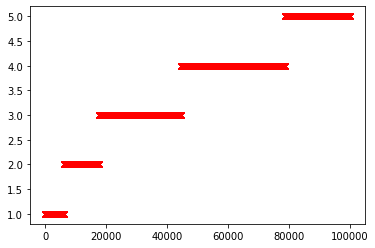

In [ ]:
plt.plot(x,"rx")

In [ ]:
ml_df_group = {}
for i in range(1,6):
 ml_df_group[i] = 0
print(ml_df_group)

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0}


In [ ]:
for i in ml_df["rate"].iloc[:]:
  ml_df_group[i] += 1

In [ ]:
ml_df_group

{1: 6110, 2: 11370, 3: 27145, 4: 34174, 5: 21201}

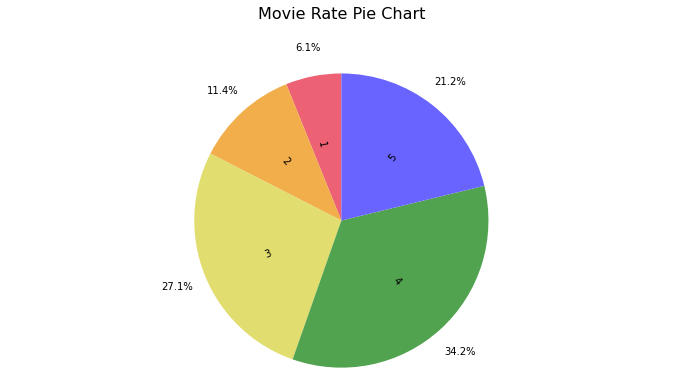

In [ ]:
plt.figure(figsize=(12, 6))
labels=["1","2","3","4","5"]
plt.pie(ml_df_group.values(),
        labels=labels,
        labeldistance = 0.5,
        pctdistance = 1.2,
        rotatelabels = True,
        textprops={'fontsize': 10},
        startangle=90,
        autopct='%1.1f%%',
        colors=["#EC6173", "#F1AE4A", "#E1DD6E", "#51A350", "#6964FF", "#BD63BE"])
plt.title('Movie Rate Pie Chart',fontsize=16,pad=40)
plt.axis('equal')
plt.show()

In [ ]:
ml_user_num = len(ml_df["user_id"].unique())
ml_movie_num = len(ml_df["item_id"].unique())
ml_effectives = len(ml_df) / (ml_user_num * ml_movie_num)
print(ml_user_num, ml_movie_num, ml_effectives)

943 1682 0.06304669364224531


### Echonest subset EDA

In [ ]:
EN_df_1 = pd.read_csv("test_data_log.tsv", sep="\t", names=["user_id", "music_id", "playcount"])
EN_df_2 = pd.read_csv("train_data_log.tsv", sep="\t", names=["user_id", "music_id", "playcount"])
EN_df = pd.concat([EN_df_1,EN_df_2], axis = 0, ignore_index = True)

In [ ]:
EN_df.dtypes

user_id        int64
music_id       int64
playcount    float64
dtype: object

In [ ]:
EN_df.describe()

,user_id,music_id,playcount
count,39300.000000,39300.000000,39300.000000
mean,987.674758,14273.925852,0.590554
std,580.230163,12394.805913,0.319664
min,0.000000,0.000000,0.301030
25%,477.000000,3224.750000,0.301030
50%,973.000000,10944.000000,0.477121
75%,1517.000000,23118.250000,0.778151
max,1977.000000,43413.000000,3.276462


In [ ]:
music_num = len(EN_df["music_id"].unique())
user_num = len(EN_df["user_id"].unique())
effectives = len(EN_df) / (music_num * user_num)

In [ ]:
print(music_num, user_num, effectives)

22459 1906 0.0009180772779985186


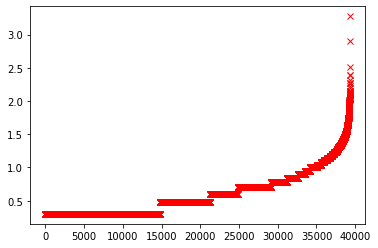

In [ ]:
x = EN_df["playcount"].tolist()
x.sort()
plt.plot(x,"rx")